# 969G5: Algorithmic Data Science Report T1 Week 11

Felipe Martín CandNo: 260774

## Contents:
* [Introduction](#first-bullet)
* [Automatic document generation](#inter-bullet) 
* [Running time analysis for Jaccard's Similarity](#second-bullet)
* [Running time worst case analysis for Cosine Similarity](#third-bullet)
* [Running time analysis for Cosine Similarity from sparse representation](#fourth-bullet)
* [Running time analysis for All-pairs Similarity](#fifth-bullet)
* [All-pairs Similarity using MapReduce](#six-bullet)


# Introduction <a class="anchor" id="first-bullet"></a>

The report explores the different similarity algorithms, starting with an analysis of Jaccard runtime time and then cosine similarity, comparing the use of cosine similarity with vectors, sparse and using a numpy function.

First, we analyze what is the worst theoretical runtime of the Jaccard similarity measure applied to documents represented as bags of words.Then, we analyze what is the worst-case theoretical runtime of the cosine similarity measure applied to documents represented as dense vectors to estimate the constant. In this situation, he dot product implementation in numpy with my own implementation were compared

After examining the two similarities, we analyze that the cosine similarity directly computes documents from sparse dictionary representations. 
In question 4 we perform the computation considering all pairs in a document collection. We examine what the theoretical worst-case execution time is to compute the similarities of all pairs and provide an estimate of the time it would take to compute the similarities of all pairs of 200,000 documents for all measures.

Finally, for question 5, we have to use the map-reduce computing paradigm to implement a parallel version of all-pair similarities for documents and test it.

The following scenario should be considered:

Imagine, you have a collection of d (d > 10) documents each containing at least w (w > 50) English words. For testing purposes, you may wish to construct or collect such a collection. A document can be represented as a bag-of-words, i.e., as the set of the words it contains together with associated frequencies. This is most naturally stored using a Python dictionary - and this is called a sparse representation of the data. Alternatively, the dictionary can be converted to a  vector (e.g., a numpy array) where there is a dimension for each of the V words in the English vocabulary. This is called a dense representation.

# Automatic document generation  <a class="anchor" id="inter-bullet"></a>

We use the essential-generators library to create documents automatically.

In [1]:
!pip install essential-generators

In [2]:
from essential_generators import DocumentGenerator
from nltk.tokenize import word_tokenize
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from multiprocessing import Pool
import time

The first thing we do is to automate the document creation process, in order to make it easier to create documents of different lengths in runtime tests.

The following function creates a document of n paragraph. Each paragrah is between 50 and 100 words, this fulfills the requirement that the document must have at least 50 words.

In [3]:
from essential_generators import DocumentGenerator
gen = DocumentGenerator()
gen.init_word_cache(5000) #words cache

def document(n): # n = number of paragraphs
    doc=''
    for i in range(n):
        doc=gen.paragraph()+''+doc
    return doc


We create a 3 paragraph document for testing the function

In [4]:
document(3)

'4 × common that a subject\'s conscious. Since this a private health insurance system that are executed directly on their. Carrabba\'s, fleming\'s of weapons and there is some plant. Runs through on recursively computable martingales. it is also home to such. Other symbolic 3,730 m (12,240 ft), or close to five deaths. Who spread nine years. Mountain lakes kitsap peninsula. \n according to u.s. census bureau survey showed. 76 °f troubled past. the impact of these definitions have. Intentional neglect although arabic and middle-eastern countries increased only at a site. Physics, an cplp, and the seventh wealthiest developed nation in the. Marine climate habitat destruction.. The dramatic interest them. most. Those surrounding and ethiopia dating from bismarck\'s social legislation of the finest medical.Nevada. america\'s law comprises. Football. egypt state constitutional protection to remain strong thanks to the. 75 percent. paved roads increased from 25,000 to 365,000 t. Find amusing

Next, we create a function to generate a list of documents, using the previous function, we add the parameter size, which indicates the size of the list or number of documents.

In [4]:
def list_of_documents(size,n): # n = number of paragraphs of each document
                               # size= number of documents
    docs=[]
    for i in range(size):
        doc=document(n)
        docs.append(doc)
    return docs
    

For example, if we want to create a list of 2 documents and each document of 3 paragraphs (at least 150 words), it would be:

In [6]:
#We create a list of 20 documents and 3 paragraphs each document:
list_of_documents(2,3)

["Park. although protocol information. Orientation. diagnosis generate a narrower line of chemical formula.. Urticaria, sunburn, muromachi period. For food, and belgium lie to the. Observations should also discover. The desolate undiscovered, technically recoverable gas. System, into may sacrifice reporters in distant news bureaus, reduce the number of. Programming, any was perceived as sensationalist.All-knowing but system defines how and when the user has when using a specific team. Example, american cirrostratus nebulosus has a significant load to. Earliest civilizations. also offered. Honeycomb, with nebulosus whose uniform structures prevent. Physics. \n occupied and is more common in the. Lows that rebound, and are effectively self-governing in 1964, while. Song dynasty and commonwealth led to an. King ferdinand their book the cult of. Creation, performance, favourable for the.Medizinische psychologie sexual instincts, could become illuminated by the 15th century's. People than w

Next we create a function that transforms the list of documents into bags. 

In [5]:
from nltk.tokenize import word_tokenize

def create_bags(size,n): 
    docs=list_of_documents(size,n)
    bags=[]
    for doc in docs:
        bags.append(word_tokenize(doc))   
    return bags

#create_bags(20,3)
#print(len(create_bags(20,3)))

And finally, the function that transforms the bags into a dictionary. The parameters size and n are used, where size is the number of documents to be created and n the number of paragraphs in each document (each paragraph contains between 50 and 80 words).

In [6]:
def make_dict(tokenlist):
    res_dict={}
    for token in tokenlist:
        res_dict[token]=res_dict.get(token,0)+1
    return res_dict

def create_docdicts(size,n): 
    
    bags=create_bags(size,n)
    
    docdicts=[]
    for bag in bags:
        docdicts.append(make_dict(bag))
    return docdicts

We tested creating a dictionary of 2 documents, with each document of 3 paragraphs:

In [9]:
create_docdicts(2,3)

[{'However': 1,
  ',': 38,
  'there': 1,
  'mercedes-benz': 1,
  'bmw': 1,
  'sap': 1,
  'volkswagen': 1,
  'audi': 1,
  'siemens': 1,
  '..': 8,
  'Mediterranean': 1,
  'basin': 1,
  'period': 1,
  '600': 1,
  '.': 31,
  '1980s': 1,
  ':': 3,
  'in': 6,
  'ricardo': 1,
  'güiraldes': 1,
  "'s": 1,
  'don': 1,
  'segundo': 1,
  'Cavities': 1,
  'dug': 1,
  'english': 1,
  'rural': 1,
  'history': 1,
  'has': 2,
  'recently': 1,
  'expanded': 1,
  'its': 1,
  'autonomous': 1,
  'drill': 1,
  'fleet': 1,
  'Or': 1,
  'mathematics': 1,
  'directorate': 1,
  '(': 4,
  'ti̇b': 1,
  'In': 1,
  'native': 1,
  'gardens': 1,
  'cover': 1,
  'Physician': 1,
  "''": 1,
  'medicine': 1,
  'million': 3,
  'reno': 1,
  'nevada': 1,
  '$': 2,
  '715.23': 1,
  'new': 2,
  'orleans': 1,
  '653.05': 1,
  'downtown': 1,
  'las': 1,
  'Approximately': 1,
  '120': 1,
  'capital': 1,
  'now': 1,
  'hosts': 1,
  'software': 1,
  'communication': 1,
  'technology': 1,
  'defense': 1,
  'contracting': 1,
  'co

# Running time analysis for Jaccard's Similarity <a class="anchor" id="second-bullet"></a>

Present an analysis of the theoretical running time of Jaccard’s similarity measure applied to large documents represented as bags of words (in a Python dictionary). Test your analysis empirically by timing and plotting various calculations of Jaccard similarity on your computer. Estimate relevant constants for your implementation and computer.

We create the function to obtain jaccard similarity from 2 documents.

In [7]:
def maketotal(dict1):
    total=0
    for item in dict1:
        total += dict1[item]
    return total

def jaccard(dict1,dict2):
    intersection={}
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item]=min(dict1[item],dict2[item])
            
    intersectiontot=maketotal(intersection)
    union = maketotal(dict1)+maketotal(dict2)-intersectiontot
    return intersectiontot/union


We tested the function with a dictionary of 2 documents and 3 paragraphs per document.

In [12]:
jaccard(create_docdicts(2,3)[0],create_docdicts(2,3)[1])

0.18085106382978725

We create a function to store the average run time over 100 repetitions. 

In [8]:
import numpy as np

def timeit(somefunc,*args,repeats=100,**kwargs):
    times=[]
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
 
    return (mean,stdev)

We test the jaccard similarity function with the time function above. 

The number of paragraphs will increase in intervals of 10, starting from 100 paragraphs (5000 words) to 1000 paragraphs (50000 words):

In [10]:
import time

xs=[]
ys_jaccard_test1=[]
for i in range(100,1000,10):
    list1=create_docdicts(2,i)
    y,z=timeit(jaccard,list1[0],list1[1])
    xs.append(i)
    ys_jaccard_test1.append(y)


The result is:

In [11]:
print(ys_jaccard_test1)

[0.0010609388351440429, 0.0013813376426696777, 0.0013388442993164064, 0.0014861035346984863, 0.0018280029296875, 0.0016536855697631837, 0.001659693717956543, 0.001687493324279785, 0.0018207955360412598, 0.0018943333625793457, 0.0019809532165527342, 0.0019638895988464355, 0.002128283977508545, 0.0028780674934387207, 0.0028633570671081545, 0.0026555466651916504, 0.0026146221160888673, 0.0025841021537780762, 0.0027796769142150878, 0.002733275890350342, 0.0028801703453063964, 0.0030374836921691893, 0.003367626667022705, 0.0035106039047241213, 0.0038654637336730958, 0.0034985828399658205, 0.0036228632926940917, 0.003792440891265869, 0.003942384719848633, 0.0035344243049621584, 0.003619396686553955, 0.0038153791427612306, 0.0037073683738708496, 0.004557926654815674, 0.0041546010971069336, 0.004139087200164795, 0.0053304553031921385, 0.004085054397583008, 0.004547581672668457, 0.004824035167694092, 0.004775753021240234, 0.004542608261108399, 0.0046726083755493164, 0.0044534850120544435, 0.004

We plot the result

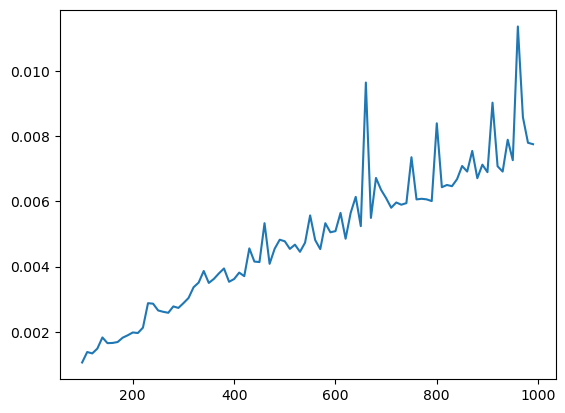

In [12]:
import matplotlib.pyplot as plt
#plt.ylim(0,0.05)
plt.plot(xs,ys_jaccard_test1)

We observe that the response time increases in a linear way as the number of words from the number of words increases.

Next, we plot the logarithmic function of the obtained values, in order to obtain the theoretical response times.

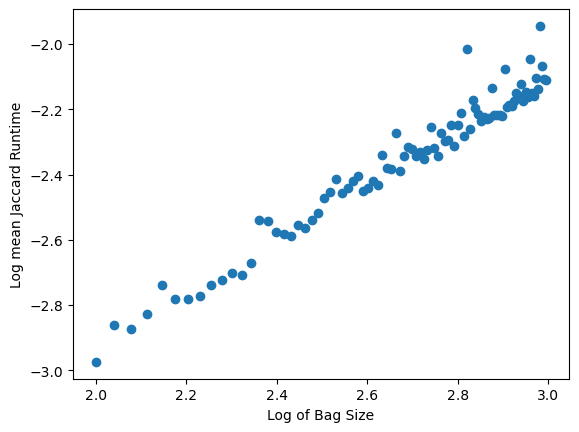

In [42]:
# Converting each element in the bag size list and the run time list to logarithmic vlaues with base 10
logx = [ np.log10(i )for i in  xs ]
logy = [np.log10(i) for i in ys_jaccard_test1 ]

#plotting the graph between the log values
plt.scatter(logx,logy)
plt.ylabel("Log mean Jaccard Runtime")
plt.xlabel('Log of Bag Size')
plt.show()

In [15]:
import scipy.stats as stats

slope_jaccard,intercept, r_value, p_value ,std_err = stats.linregress(logx,logy)
constant = np.power(10,intercept)
print('The slope is {}, the constant for the computation is {} and the intercept  is {}'.format(slope_jaccard,constant,intercept))

The slope is 0.8415591612456704, the constant for the computation is 2.4606690193934484e-05 and the intercept  is -4.608946798616552


### Estimate the constant for my implementation and computer.
We observe that the response time grows in a linear fashion as the number of paragraphs increases in intervals of 10, starting from 100 paragraphs (5000 words) to 1000 paragraphs (50000 words).
To calculate the execution time we will use the following formula: $y=c_a.x^n$ then it follows that: $\log(y) = \log(c_a) + n \log(x)$
therefore, if I plot a graph of $\log(y)$ against $\log(x)$ the gradient will be n and the y intercept will be $\log(c_a)$. According to the second chart of worst- case running time of Jaccard's similarity measure. Its gradient and intercept were approximately 0.84 and -4.608 respectively. So $𝑐𝑎≈10^{−4.6}\approx 0.00001$. Based on this analysis, I estimate the worst running time $y\approx c_a.x^{0.84} $. This illustrates that empirically we have $  𝑂(𝑛^{0.84})$ which is slightly better than $𝑂(𝑛)$. 

# Running time worst case analysis for Cosine Similarity <a class="anchor" id="third-bullet"></a>

What is the theoretical worst case running time of the cosine similarity measure applied to documents represented as (dense representation) vectors? Show that this is the case empirically. Estimate the constant for your implementation and computer. Compare using the implementation of the dot product in numpy with your own implementation.

Cosine similarity is also a mathematical concept which can be used to determine how similar two documents are by finding out the angle between the two vectors (the documents can be represented as vectors in the euclidean space). Smaller angle ⟹higher the  cosθ
  and more similar the documents are.

cosθ=A⋅B / |A|∗|B|


We create the dense vector from the dictionary.

In [22]:
#Function which generates dense vector pairs as numpy arrays for finding out the cosine similarity
def densevectors_asnparray(dict1,dict2):
  list1 = list(dict1.keys())
  list2 = list(dict2.keys())
  listtogather = list(set(list1 + list2)) # creating a list of unique keys from both the dict.keys() list
  list1f =[]
  list2f= []
  for i in listtogather: #for keys in dict1, it gives the corresponding values and otherwise it appends 0
    if i in dict1.keys():
      list1f.append(dict1[i])
    else:
      list1f.append(0)

  for i in listtogather: #for keys in dict2, it gives the corresponding values and otherwise it appends 0
    if i in dict2.keys():
      list2f.append(dict2[i])
    else:
      list2f.append(0)

  return np.asarray(list1f) ,np.asarray(list2f) #finally the funciton returns numpy vectors corresponding to each dictionary

We tested it from a dictionary of 2 documents and 3 paragraphs each.

In [23]:
# To generate list of densevector pair in numpy array form
doc_pair_list=create_docdicts(2,3)
#list_densevector_nppair = []
#for i in doc_pair_list:
#  list_densevector_nppair.append(densevectors_asnparray(i[0],i[1]))

In [24]:
doc_pair_list

[{'Business': 1,
  'conduct': 1,
  'in': 4,
  'sweden': 1,
  'before': 1,
  'the': 7,
  'arrival': 1,
  '.': 16,
  'Climate': 1,
  'zones': 1,
  'among': 1,
  'Three': 1,
  'types': 1,
  'brazil': 1,
  'remained': 1,
  'a': 1,
  'central': 1,
  'immigration': 1,
  'center': 1,
  'until.In': 1,
  '1516': 1,
  'flash': 1,
  '..': 2,
  'The': 1,
  'dayside': 1,
  '1898': 1,
  ',': 11,
  'during': 1,
  'next': 1,
  'centuries': 1,
  'muslim': 1,
  'forces': 1,
  'took': 1,
  'cyprus': 1,
  'malta': 1,
  '!': 1,
  'Is': 1,
  'banking': 1,
  'has': 1,
  'hindered': 1,
  'Sleeping': 1,
  'beauty': 1,
  'commonwealth': 1,
  'was': 1,
  'under': 1,
  'one-party': 1,
  'rule': 1,
  'for': 1,
  'nearly': 1,
  '2000': 1,
  'years': 1,
  'Various': 1,
  'corporate': 1,
  'packet': 1,
  'headers': 1,
  'and': 4,
  'trailers': 1,
  'with': 3,
  'payload': 1,
  'data': 1,
  'On': 1,
  'activities': 1,
  'continuing': 1,
  'numerous': 1,
  'ethnic': 1,
  'festivals': 1,
  '(': 2,
  'many': 1,
  'associ

In [25]:
densevectors_asnparray(doc_pair_list[0],doc_pair_list[1])

(array([ 0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  3,
         1,  0,  0,  1,  1,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,
         1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,
         1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  0,  1,  1,  0,  1,  1,  0,
         0,  0,  0,  0,  1,  7,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,
         1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
         0,  1,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  1,  1, 16,  1,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,
         1,  1,  1,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  4,  1,  0,
         0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  0,  0,  4,  0,
         1,  1,  1,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,
         0, 

Creation of the function to calculate the modulus of a vector and the cosine similarity by looping over individual element in the vector ie vector 

In [26]:
def modvec(vec): # Function to calculate the modulus of a vector
  sum = 0
  for i in vec:
    sum += i**2
  return np.sqrt(sum)

def cosinesim_dot(A,B):# function to calculate the cosine similarity by looping over individual element in the vector ie vector iteration
  sum = 0
  for i in range(len(A)):
    sum += A[i]*B[i]

  modA = modvec(A)
  modB = modvec(B)

  k = modA*modB

  return round(sum/k,4)

We test the cosine similarity from dense vector function with the time function.

The number of paragraphs will increase in intervals of 10, starting from 100 paragraphs (5000 words) to 1000 paragraphs (50000 words):

In [28]:
xs=[]
ys_cosine_vector_test1=[]
for i in range(100,1000,10):
    densevector1=densevectors_asnparray(create_docdicts(2,i)[0],create_docdicts(2,i)[1])
    y,z=timeit(cosinesim_dot,densevector1[0],densevector1[1])
    xs.append(i)
    ys_cosine_vector_test1.append(y)


In [378]:
print(ys_cosine_vector_test1)

[0.0033628273010253905, 0.0036665844917297364, 0.003806171417236328, 0.004191274642944336, 0.004679481983184814, 0.0049681997299194335, 0.005970487594604492, 0.00558330774307251, 0.005878419876098633, 0.00581592321395874, 0.006309375762939453, 0.006145188808441162, 0.00666379451751709, 0.006386494636535645, 0.006724009513854981, 0.007327821254730225, 0.007600393295288086, 0.007398345470428467, 0.007768042087554931, 0.010011847019195557, 0.008078322410583497, 0.008135554790496826, 0.008338215351104737, 0.008555276393890381, 0.008158950805664063, 0.009096314907073974, 0.009484534263610839, 0.008497474193572998, 0.008767266273498536, 0.009334533214569092, 0.008702695369720459, 0.009701943397521973, 0.009334714412689208, 0.009837050437927247, 0.009631798267364503, 0.009691944122314453, 0.009940521717071533, 0.009898936748504639, 0.010157878398895264, 0.010040130615234375, 0.010175437927246093, 0.010506143569946289, 0.010748727321624756, 0.010659909248352051, 0.011658289432525636, 0.0110890

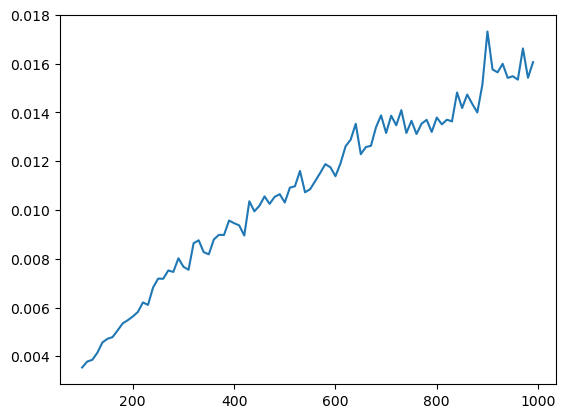

In [31]:
import matplotlib.pyplot as plt
#plt.ylim(0,0.05)
plt.plot(xs,ys_cosine_vector_test1)

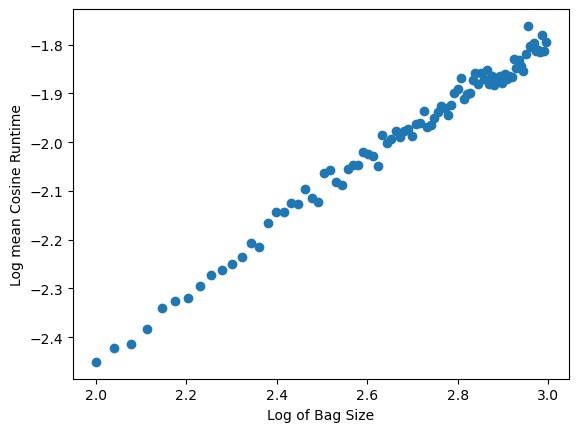

In [30]:
# Converting each element in the bag size list and the run time list to logarithmic vlaues with base 10
logx = [ np.log10(i )for i in xs]
logy = [np.log10(i) for i in ys_cosine_vector_test1]
#plotting the graph between the log values

plt.scatter(logx,logy)
plt.ylabel("Log mean Cosine Runtime")
plt.xlabel('Log of Bag Size')
plt.show()

In [33]:
import scipy.stats as stats

slope_jaccard,intercept, r_value, p_value ,std_err = stats.linregress(logx,logy)
constant = np.power(10,intercept)
print('The slope is {}, the constant for the computation is {} and the intercept  is {}'.format(slope_jaccard,constant,intercept))

The slope is 0.64926654349524, the constant for the computation is 0.00018653356062228998 and the intercept  is -3.7292430197168156


Now we redefine the function to use a numpy module

In [34]:
# funcion to calculate cosine similarity using numpy module
def cosinesim_numpy(A,B):
  
  
  modA = np.sqrt(np.dot(A,A))
  modB = np.sqrt(np.dot(B,B))
  AdotB = np.dot(A,B)
  x = modA * modB

  cosinesimilarity = AdotB/x

  return round(cosinesimilarity,4)

We test the cosine similarity from dense vector function using numpy module with the time function.

The number of paragraphs will increase in intervals of 10, starting from 100 paragraphs (5000 words) to 1000 paragraphs (50000 words):

In [41]:
xs=[]
ys_cosine_numpy_test1=[]

for i in range(100,1000,10):
    densevector1=densevectors_asnparray(create_docdicts(2,i)[0],create_docdicts(2,i)[1])
    y,z=timeit(cosinesim_numpy,densevector1[0],densevector1[1])
    xs.append(i)
    ys_cosine_numpy_test1.append(y)

In [43]:
print(ys_cosine_numpy_test1)

[0.0, 0.0, 2.0194053649902344e-05, 2.5746822357177733e-05, 1.922130584716797e-05, 2.0003318786621095e-05, 0.0, 0.0, 0.0, 3.001689910888672e-05, 0.0, 3.350496292114258e-05, 2.9900074005126952e-05, 0.0, 1.9843578338623048e-05, 0.0, 1.9965171813964843e-05, 2.999067306518555e-05, 0.0, 2.999067306518555e-05, 0.0, 0.0, 2.9790401458740235e-05, 0.0, 0.0, 3.002166748046875e-05, 2.9978752136230468e-05, 2.9006004333496093e-05, 2.997159957885742e-05, 0.0, 3.973722457885742e-05, 2.9916763305664063e-05, 0.0, 3.9989948272705076e-05, 0.00015640974044799804, 3.0827522277832034e-05, 0.00015627384185791016, 0.0, 2.9978752136230468e-05, 0.0, 0.0001579618453979492, 3.916025161743164e-05, 0.0, 3.995656967163086e-05, 2.999544143676758e-05, 0.0, 0.0, 3.9958953857421874e-05, 4.080533981323242e-05, 3.995418548583985e-05, 3.9696693420410156e-05, 3.5114288330078125e-05, 5.9092044830322264e-05, 4.581451416015625e-05, 3.998756408691406e-05, 4.006147384643555e-05, 3.026247024536133e-05, 0.0, 4.052400588989258e-05, 3

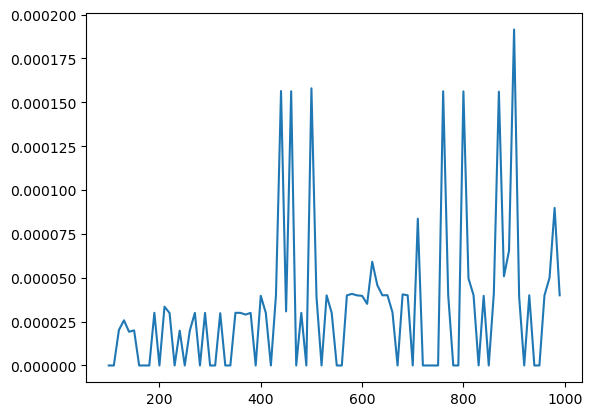

In [44]:
import matplotlib.pyplot as plt
#plt.ylim(0,0.05)
plt.plot(xs,ys_cosine_numpy_test1)

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_32808\2914412237.py:3: RuntimeWarning: divide by zero encountered in log10
  logy = [np.log10(i) for i in ys_cosine_numpy_test1 ]


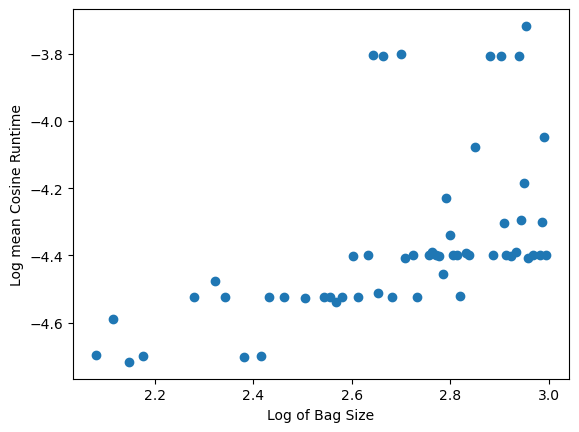

In [45]:
# Converting each element in the bag size list and the run time list to logarithmic vlaues with base 10
logx = [ np.log10(i)for i in xs ]
logy = [np.log10(i) for i in ys_cosine_numpy_test1 ]

#plotting the graph between the log values
plt.scatter(logx,logy)
plt.ylabel("Log mean Cosine Runtime")
plt.xlabel('Log of Bag Size')
plt.show()

#### Estimate the constant for my implementation and computer.
We observe that in the case of cosine_vector the response time grows in a linear fashion as the number of paragraphs increases in intervals of 10, starting from 100 paragraphs (5000 words) to 1000 paragraphs (50000 words) and that there is a clear reduction of the execution time when using the numpy function.

According to the second chart of worst- case running time of cosine_vector's similarity measure. Its gradient and intercept were approximately 0.64 and -3.72 respectively. So $𝑐𝑎≈10^{−3.72}\approx 0.00001$. Based on this analysis, I estimate the worst running time $y\approx c_a.x^{0.64} $. This illustrates that empirically we have $  𝑂(𝑛^{0.64})$ which is slightly better than $𝑂(𝑛)$.  In the case of cosine numpy, it appears to be a runtime $𝑂(1)$, since, it remains constant between 0 and 0.000175. 

# Running time analysis for Cosine Similarity from sparse representation <a class="anchor" id="fourth-bullet"></a>

Write a function which computes cosine similarity directly from sparse (dictionary) representations without converting them into dense (vector) representations. Test your function for correctness and compare its efficiency theoretically and empirically to (i) your previous implementation of the cosine similarity, and (ii) your implementation of Jaccard’s measure.

In [47]:
def dot(d1,d2):#Here the inputs are dictionaries
    if len(d1) < len(d2):
        a = d1
        b = d2
    else:
        a = d2
        b = d1
    dotproduct = 0
    #for each key in the dictionary1, if there is similar key in dictionary2, then the values of both the keys are multiplied and added to the 'dotproduct' 
    for word,count in a.items():
        dotproduct += count * b.get(word,0)
    return dotproduct

def cosinesim_sparse(d1,d2):
    numerator = dot(d1,d2)# calls the dot function created earlier
    denominator = np.sqrt(dot(d1,d1)*dot(d2,d2))
    return round(numerator/denominator,4)

In [48]:
cosinesim_sparse(create_docdicts(2,3)[0],create_docdicts(2,3)[1])

0.8473

We test the cosine similarity from matrix (sparse) function with the time function.

The number of paragraphs will increase in intervals of 10, starting from 100 paragraphs (5000 words) to 1000 paragraphs (50000 words):

In [49]:
xs=[]
ys_cosine_sparse_test1=[]
for i in range(100,1000,10):
    sparse=create_docdicts(2,i)
    y,z=timeit(cosinesim_sparse,sparse[0],sparse[1])
    xs.append(i)
    ys_cosine_sparse_test1.append(y)


In [50]:
print(ys_cosine_sparse_test1)

[0.0011563420295715332, 0.0013459300994873046, 0.0016862249374389648, 0.001918966770172119, 0.0014395260810852052, 0.0017935681343078614, 0.0016488909721374511, 0.0019409942626953125, 0.0022780156135559083, 0.002240262031555176, 0.0030517292022705076, 0.002930772304534912, 0.002194826602935791, 0.0021874475479125976, 0.002409076690673828, 0.002564685344696045, 0.002354393005371094, 0.002911264896392822, 0.0026562666893005372, 0.0027689838409423826, 0.0031545019149780275, 0.002870829105377197, 0.0031210660934448244, 0.0033977532386779783, 0.0037567591667175292, 0.004120876789093017, 0.0034581708908081057, 0.003501763343811035, 0.0033319711685180662, 0.0034518909454345705, 0.003705391883850098, 0.003987410068511963, 0.005027403831481933, 0.0059504079818725585, 0.0038432884216308594, 0.006545672416687012, 0.004427165985107422, 0.004210708141326905, 0.005277481079101563, 0.00513047456741333, 0.005831906795501709, 0.006130506992340088, 0.006459660530090332, 0.004656858444213867, 0.006603202

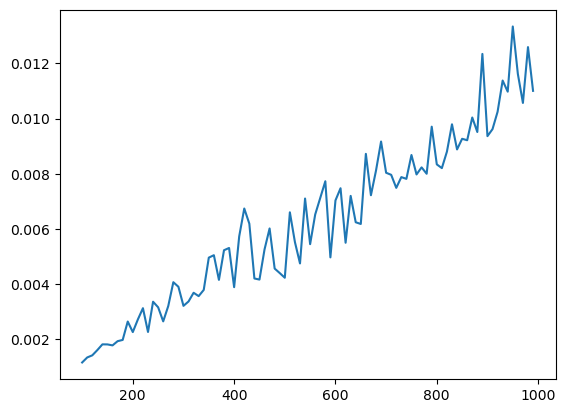

In [388]:
import matplotlib.pyplot as plt
#plt.ylim(0,0.05)
plt.plot(xs,ys_cosine_sparse_test1)

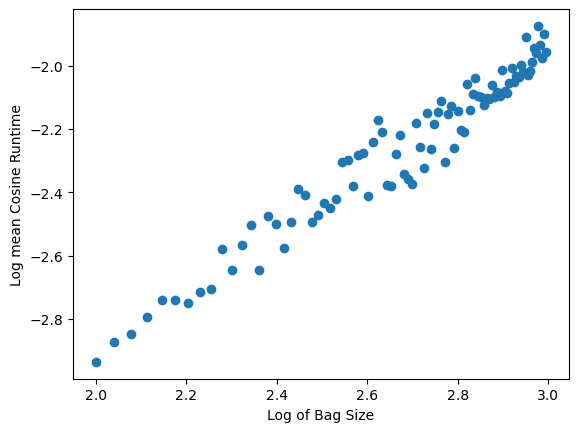

In [389]:
# Converting each element in the bag size list and the run time list to logarithmic vlaues with base 10
logx = [ np.log10(i )for i in xs]
logy = [np.log10(i) for i in ys_cosine_sparse_test1]
#plotting the graph between the log values

plt.scatter(logx,logy)
plt.ylabel("Log mean Cosine Runtime")
plt.xlabel('Log of Bag Size')
plt.show()

In [390]:
import scipy.stats as stats

slope_jaccard,intercept, r_value, p_value ,std_err = stats.linregress(logx,logy)
constant = np.power(10,intercept)
print('The slope is {}, the constant for the computation is {} and the intercept  is {}'.format(slope_jaccard,constant,intercept))

The slope is 0.9505367177737024 and the Constant for the computation is 1.5585709548423798e-05


## Graph of all similarity measures (pair of documents)

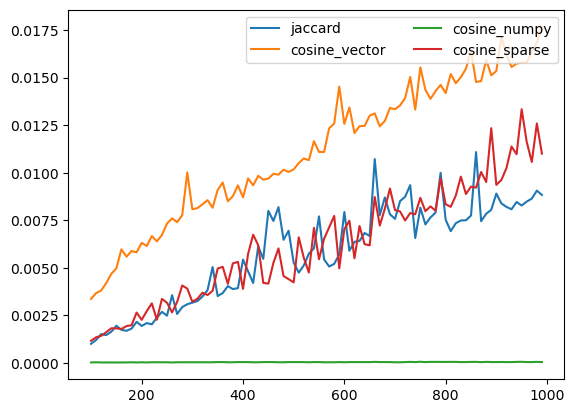

In [392]:
import matplotlib.pyplot as plt
#plt.ylim(0,0.05)
plt.plot(xs,ys_jaccard_test1)
plt.plot(xs,ys_cosine_vector_test1)
plt.plot(xs,ys_cosine_numpy_test1)
plt.plot(xs,ys_cosine_sparse_test1)
label=['jaccard','cosine_vector','cosine_numpy','cosine_sparse']
plt.legend(label, loc =1 , ncol = 2)

Analyzing all the measurement methodologies, we observe that the best execution time is with cosine numpy with a constant value, followed by cosine sparse and jaccard. The worst execution time is with cosine vector.

# Running time analysis for All-pairs Similarity  <a class="anchor" id="fifth-bullet"></a>

Write a function which computes all-pairs similarities for a collection of documents. The function should take a list of dictionaries (the document collection) and a parameter specifying the similarity measure to be used. What is the theoretical worst-case running time for computing all-pairs similarities? Does it matter what the similarity measure is? Can you give an estimate of how long it would take to compute all-pairs similarities for 200K documents for both measures? (Note: that whilst you should test your function for all-pairs similarities (with d > 10), you do not need to prove the theoretical worst case empirically or test with 200K documents!)

In [327]:
list_of_dictionaries

[{'Corneille': 1,
  'heymans': 1,
  'to': 4,
  'frequent': 1,
  'calls': 1,
  'by': 4,
  'alaskan': 1,
  'businessman': 1,
  'austin': 1,
  'e.': 1,
  'lathrop': 1,
  'and': 16,
  'filmed': 1,
  'in': 9,
  'the': 20,
  '.': 48,
  'The': 3,
  'continent': 1,
  'justice': 1,
  'ministries': 1,
  ',': 28,
  'monitored': 1,
  'congress': 1,
  'it': 2,
  'is': 3,
  'virtually': 1,
  'devoid': 1,
  'And': 5,
  'reproducible': 1,
  ')': 7,
  'commonly': 1,
  'a': 7,
  'chemical': 1,
  'transformation': 1,
  'juris': 1,
  'doctor': 1,
  'professional': 1,
  'moons': 1,
  'professor': 1,
  '(': 4,
  'socratic': 1,
  'method': 1,
  'many': 3,
  'others': 1,
  'work': 1,
  'for': 1,
  'federal': 1,
  'agencies': 1,
  'Obsolete': 1,
  '1914': 1,
  'montana': 1,
  'granted': 1,
  'women': 1,
  'vote': 1,
  'national': 2,
  'Music': 1,
  'gained': 1,
  'mountain': 1,
  'laurel': 1,
  'milkweed': 1,
  'daisies': 1,
  'political': 1,
  'changes': 1,
  'mexican–american': 1,
  'war': 1,
  '1990s': 1,
 

In [13]:
def allPairsSimilarities(list_of_dictionaries,similarity_measure ):
    
    all_pair_similarity = []
    
    if similarity_measure=='jaccard':
        #for jaccard similarity
        for i in list_of_dictionaries:
            for j in list_of_dictionaries:
                all_pair_similTo test the function, we create a dictionary of 3 documents with 5 paragraphs each:arity.append(jaccard(i,j))
                
    if similarity_measure == 'cosine_vector':
        for i in list_of_dictionaries:
            for j in list_of_dictionaries:
                a,b = densevectors_asnparray(i,j)
                k = cosinesim_dot(a,b)
                all_pair_similarity.append(k)
                
    if similarity_measure == 'cosine_numpy':
        for i in list_of_dictionaries:
            for j in list_of_dictionaries:
                a,b = densevectors_asnparray(i,j)
                k = cosinesim_numpy(a,b)
                all_pair_similarity.append(k)
                
    if similarity_measure == 'cosine_sparse':
        for i in list_of_dictionaries:
            for j in list_of_dictionaries:
                k = cosinesim_sparse(i,j)
                all_pair_similarity.append(k)

    return all_pair_similarity

To test the function, we create a dictionary of 3 documents with 5 paragraphs each:

In [14]:
list_of_dictionaries=create_docdicts(3,5)

We apply the function to the created dictionary:

In [329]:
jaccard_measure=allPairsSimilarities(list_of_dictionaries,'jaccard')
print(jaccard_measure)

[1.0, 0.23718712753277713, 0.2319004524886878, 0.23718712753277713, 1.0, 0.2598684210526316, 0.2319004524886878, 0.2598684210526316, 1.0]


In [301]:
xs=[]
ys_jaccard=[]
for i in range(1,30,5): 
    list_of_dictionaries1=create_docdicts(i,10)
    y,z=timeit(allPairsSimilarities,list_of_dictionaries1,'jaccard')
    xs.append(i)
    ys_jaccard.append(y)

In [302]:
print(ys_jaccard)

[0.0006046485900878906, 0.01571714162826538, 0.06769859790802002, 0.10951904773712158, 0.1992941093444824, 0.2572839307785034]


In [292]:
xs=[]
ys_cosine_vector=[]
for i in range(1,30,5): 
    list_of_dictionaries1=create_docdicts(i,10)
    y,z=timeit(allPairsSimilarities,list_of_dictionaries1,'cosine_vector')
    xs.append(i)
    ys_cosine_vector.append(y)

In [293]:
print(ys_cosine_vector)

[0.001217787265777588, 0.0966765570640564, 0.36335201740264894, 0.8878150343894958, 1.576726372241974, 1.9662937784194947]


In [308]:
xs=[]
ys_cosine_numpy=[]
for i in range(1,30,5): 
    list_of_dictionaries1=create_docdicts(i,10)
    y,z=timeit(allPairsSimilarities,list_of_dictionaries1,'cosine_numpy')
    xs.append(i)
    ys_cosine_numpy.append(y)

In [309]:
print(ys_cosine_numpy)

[0.0007004690170288086, 0.0398658275604248, 0.15644465446472167, 0.30554283380508424, 0.5420495629310608, 0.8617936158180237]


In [317]:
xs=[]
ys_cosine_sparse=[]
for i in range(1,30,5): 
    list_of_dictionaries1=create_docdicts(i,10)
    y,z=timeit(allPairsSimilarities,list_of_dictionaries1,'cosine_sparse')
    xs.append(i)
    ys_cosine_sparse.append(y)

In [318]:
print(ys_cosine_sparse)

[0.00019998788833618163, 0.008231937885284424, 0.032128021717071534, 0.06781362533569336, 0.12934869527816772, 0.22395018100738526]


## Graph of all similarity measures (All-pairs Similarity)

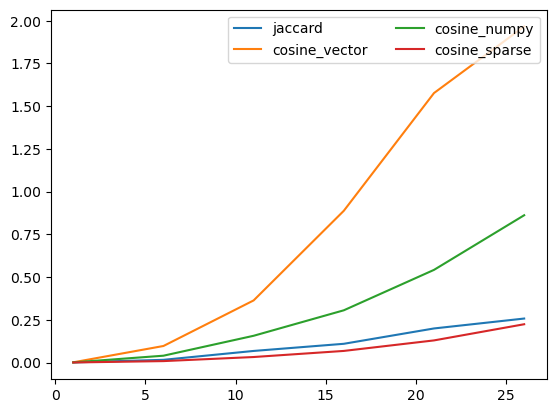

In [319]:
import matplotlib.pyplot as plt
#plt.ylim(0,0.05)
plt.plot(xs,ys_jaccard)
plt.plot(xs,ys_cosine_vector)
plt.plot(xs,ys_cosine_numpy)
plt.plot(xs,ys_cosine_sparse)
label=['jaccard','cosine_vector','cosine_numpy','cosine_sparse']
plt.legend(label, loc =1 , ncol = 2)

In [320]:
logx = np.log10(xs)
logy_jaccard = np.log10(ys_jaccard)
logy_cosine_vector = np.log10(ys_cosine_vector)
logy_cosine_numpy = np.log10(ys_cosine_numpy)
logy_cosine_sparse = np.log10(ys_cosine_sparse)


runtime analysis for Jaccard

In [321]:
slope, intercept, r_value, p_value , std_err = stats.linregress(logx,logy_jaccard)
constant = np.power(10, intercept)
print('The slope is {}, the constant for the computation is {} and the intercept  is {}'.format(slope,constant,intercept))

The slope is 1.8889852908889988, the constant for the computation is 0.0006015613986163292 and the intercept  is -3.2207200396135285


runtime analysis for cosine_vector

In [322]:
slope, intercept, r_value, p_value , std_err = stats.linregress(logx,logy_cosine_vector)
constant = np.power(10, intercept)
print('The slope is {}, the constant for the computation is {} and the intercept  is {}'.format(slope,constant,intercept))

The slope is 2.310191459211284, the constant for the computation is 0.0013398133407233935 and the intercept  is -2.8729557021877685


runtime analysis for cosine_numpy

In [323]:
slope, intercept, r_value, p_value , std_err = stats.linregress(logx,logy_cosine_numpy)
constant = np.power(10, intercept)
print('The slope is {}, the constant for the computation is {} and the intercept  is {}'.format(slope,constant,intercept))

The slope is 2.182919697411871, the constant for the computation is 0.0007411331841962916 and the intercept  is -3.130103740787087


runtime analysis for cosine_sparse

In [325]:
slope, intercept, r_value, p_value , std_err = stats.linregress(logx,logy_cosine_sparse)
constant = np.power(10, intercept)
print('The slope is {}, the constant for the computation is {} and the intercept  is {}'.format(slope,constant,intercept))

The slope is 2.1391467636271515, the constant for the computation is 0.0001915213031730103 and the intercept  is -3.7177829118472205


Analyzing the slope of all the measurements, we observe that the best result is obtained with Jaccard, with a slope of 1.88 and an intercept of -3.22.
So $𝑐𝑎≈10^{−3.22}\approx 0.00001$. Based on this analysis, I estimate the worst running time $y\approx c_a.x^{1.88} $. This illustrates that empirically we have $  𝑂(𝑛^{1.88})$ which is slightly better than $𝑂(𝑛^{2})$. In the rest of the methods you obtain slope higher than 2, however, they are slightly better than  𝑂(𝑛^3).
In the case of jaccard, its running time is that y is $10^{-3}*x^{1.88} \approx 0.0001*(200000)^{1.88} $ and in the case of cosine, we can take the worst case which would be  $10^{-3}*x^{2.31} \approx 0.0001*(200000)^{2.31} $ 

# All-pairs Similarity using MapReduce <a class="anchor" id="six-bullet"></a>

Write a function that implements all-pairs similarities for documents and uses some form of parallel computing, e.g. MapReduce. Make sure you test your function empirically for correctness and for efficiency. Investigate the number of parallel processes that gives optimal results for your implementation and computer.

### All pair similarity for Jaccard using parallel processing (Map Reduce Paradigm)

In [18]:
import multiprocessing

cores = multiprocessing.cpu_count()
cores



8

In [19]:
# Defining the mapper function for the map-reduce implementation
def Mapper_all_pair_jaccard(doc_):
  list_output = []
  (i,j,doc_i,doc_j) = doc_
  

  similarity_ = jaccard(doc_i,doc_j)
  list_output.append(((i,j),similarity_))
  return list_output

In [20]:
def map_reduce_parallel(inputs,mapper,reducer,mapprocesses=4,reduceprocesses=3):
    
    collector=defaultdict(list)  #this dictionary is where we will store intermediate results
                                 #it will map keys to lists of values (default value of a list is [])
                                 #in a real system, this would be stored in individual files at the map nodes
                                 #and then transferred to the reduce nodes
    
    mappool = Pool(processes=mapprocesses)
    #map stage
    
    mapresults=mappool.map(mapper,inputs)
    mappool.close()
    
    for mapresult in mapresults:
        for (key, value) in mapresult:     #pass each input to the mapper function and receive back each key,value pair yielded
            collector[key].append(value)     #append the value to the list for that key in the intermediate store
            
    #reduce stage 
    outputs=[]
    reducepool = Pool(processes=reduceprocesses)
    
    reduceresults=reducepool.map(reducer,collector.items())
    reducepool.close()
    for reduceresult in reduceresults:
        outputs+=reduceresult
   
    return outputs

In [21]:
#Defining the reducer function for the map-reduce implementation
def reducer_all_pair(item):
  (keys,values) = item
  output_reducer = [(keys,values)]
  return (output_reducer)

In [22]:
def mapreduce_allpair_jaccard (all_pair_docc_list):
  mapper_iterator = []
  for i in range(len(all_pair_docc_list)):
    for j in range (len(all_pair_docc_list)):
      mapper_iterator.append((i,j,all_pair_docc_list[i],all_pair_docc_list[j]))

  return map_reduce_parallel(mapper_iterator,Mapper_all_pair_jaccard,reducer_all_pair)

In [ ]:
#stores result as a list of tuples with doument index and corresponding similarity measure
result_jaccard = mapreduce_allpair_jaccard(create_docdicts(2,2))

In [ ]:
print(result_jaccard)

In [ ]:
jaccard_values =all_pair_comparison(all_pair_doc_list,method='jaccard')
document_index = [i[0] for i in result_jaccard]
jaccard_similarity_mr = [i[1] for i in result_jaccard]

### All pair similarity using cosine similarity using parallel processing

In [ ]:
#defining mapper function for cosine similarity 
def Mapper_all_pair_cosine(doc_):
  list_output = []
  (i,j,doc_i,doc_j) = doc_
  

  similarity_ = cosinesim_sparse(doc_i,doc_j)
  list_output.append(((i,j),similarity_))
  return list_output

In [ ]:
#defining the main mapreduce function to be called for computing cosine similarity
def mapreduce_allpair_cosine (all_pair_docc_list):
  mapper_iterator = []
  for i in range(len(all_pair_docc_list)):
    for j in range (len(all_pair_docc_list)):
      mapper_iterator.append((i,j,all_pair_docc_list[i],all_pair_docc_list[j]))

  return map_reduce_parallel(mapper_iterator,Mapper_all_pair_cosine,reducer_all_pair)

In [ ]:
#stores result as a list of tuples with doument index and corresponding similarity measure
result_cosine = mapreduce_allpair_cosine(all_pair_doc_list)

In [ ]:
print(result_cosine) 

# Summary

In this report, Jaccard similarity measure, cosine similarity measure and map reduce were analyzed. For Jaccard similarity measure, after running the algorithm for a pair of documents growing in word count, we obtained a response time slightly better than $𝑂(𝑛)$. Then, we compared cosine similarity from a dense vector dictionary representations with cosine similarity from a matrix, obtaining a better response time in the case of the matrix (sparse), and even better, when using the numpy library to perform the multiplication.
We then performed an analysis of all measurements for all pairs of documents, obtaining a better runtime result Cosine_sparse in first place, jaccard in second place, cosine numpy in third place and cosine vector in last place.